In [26]:
import pandas as pd
import warnings
from typing import Dict, Iterator, Any
import matplotlib.pyplot as plt

In [24]:
def iterate_dataframes(path: str) -> Iterator[pd.DataFrame]:
    """
    Iterates over all .csv files in path as pd.DataFrame
    """
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=pd.errors.DtypeWarning)
        csvs = [path + x for x in os.listdir(path) if "csv" in x]
    
        for csv in csvs:
            yield pd.read_csv(csv,  lineterminator='\n')

def aggregate_dataframe(df: pd.DataFrame) -> Dict[str, Any]:
    """
    Aggregates dataframe to dict.
    """
    df_la = df.groupby("language").count().reset_index()
    languages = df_la['language'].tolist()
    lang_counts = df_la['username'].tolist()
    unique_user_count = df['userid'].unique().shape[0]
    row_count = df.shape[0]
    duplicated_count = df.duplicated(subset="text", keep=False).sum()
    date = df.iloc[0]['tweetcreatedts'][:10]
    aggregation = {'unique_users': unique_user_count,
                  'row_count': row_count,
                  'text_duplicated_count': duplicated_count,
                  'date':date}
    aggregation = {**dict(zip(languages, lang_counts)), **aggregation}
    return aggregation
    
    
    

In [25]:
path = "/Users/robinfeldmann/Abschlussarbeit/Data/2022/"
agg_dicts = []

for ind, df in enumerate(iterate_dataframes(path)):
    agg = aggregate_dataframe(df)
    agg_dicts.append(agg)
    print(f"{ind}/311", end="\r")
    
df_agg = pd.DataFrame(agg_dicts).fillna(0)

In [27]:
df_agg

,am,ar,bg,bn,ca,ckb,cs,cy,da,de,...,zh,unique_users,row_count,text_duplicated_count,date,sd,km,lo,ug,bo
0,33.0,639,72,305,469,4.0,253,67,244,15852,...,542,155908,326229,198385,2022-05-14,0.0,0.0,0.0,0.0,0.0
1,6.0,1950,44,34,90,4.0,100,19,77,3924,...,483,28056,63866,1035,2022-09-24,2.0,0.0,0.0,0.0,0.0
2,17.0,693,43,324,225,1.0,288,24,168,12670,...,1066,113255,245001,152564,2022-05-23,0.0,0.0,0.0,0.0,0.0
3,17.0,2026,25,192,300,7.0,435,22,300,15123,...,724,244493,395772,284854,2022-03-03,6.0,1.0,0.0,0.0,0.0
4,8.0,260,35,70,58,1.0,94,15,125,5259,...,203,28188,63866,897,2022-09-13,2.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,2.0,220,42,23,70,1.0,96,7,85,3960,...,418,21540,51155,694,2022-10-02,0.0,0.0,0.0,0.0,0.0
307,13.0,312,108,260,115,6.0,405,12,141,11810,...,664,76073,164068,102939,2022-07-13,0.0,0.0,0.0,1.0,0.0
308,2.0,204,33,40,101,2.0,108,15,116,1919,...,228,20256,47580,1496,2022-11-12,0.0,0.0,0.0,0.0,0.0
309,24.0,177,32,43,58,2.0,166,12,89,8002,...,249,53956,113175,83251,2022-07-24,0.0,0.0,0.0,1.0,0.0


<BarContainer object of 311 artists>

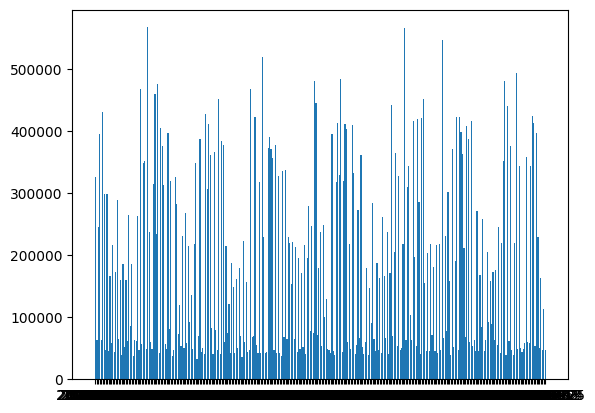

In [29]:

fig, ax = plt.subplots()
ax.bar(df_agg['date'], df_agg['row_count'])